# This project finds the smallest primitive for all prime numbers less than N


In [14]:
import math

#Define a few usefull functions

In [15]:
#Fast exponentiation modulo an integer using consecutive squaring
#compute a**x mod n
def pow_mod(a,x,n):
    result=1
    temp_a, temp_x = a, x#if we do not wish to modify a or x
    while temp_x>0:
        if temp_x%2!=0:
            result=(result*temp_a) % n
        temp_a=temp_a**2 % n   
        temp_x=temp_x//2
    return result

In [16]:
#Finding the Greatest Common Divisor
def gcd(a=1,b=1):
    if a==0:
        return b
    g=gcd(b%a,a)
    return g
    
    
#Extended Euclidean Algorithm: provides both the greatest common divisor and the inverse modulo the other number
def generalized_Euclidean(a=1,b=1):    
    if a == 0:
        return (b, 0, 1)
    else:
        (gcd, x, y) = generalized_Euclidean(b%a, a)
        return (gcd, (y - int(b / a)*x), x)

In [17]:
#Generate the prime numbers less than a given N using the Sieve of Eratosthenes
def primes_by_Eratosthenes(N=1000000):
    prime_list=[2,3]
    i=5
    while i<=N:
        if i%2!=0 and 2%3!=0:
            j=1
            flag=True
            sqrt_i=int(math.sqrt(i))
            while prime_list[j]<=sqrt_i and flag:
                if i% prime_list[j]==0:
                    flag=False
                    break
                j+=1
            if flag:
                prime_list.append(i)
        i+=1
    return prime_list
    
primes=primes_by_Eratosthenes()

In [18]:
#List the prime factors
def prime_factors(n):
    prime_factors=[]
    for prime in primes:
        if prime>n:
            break
        else:
            if n%prime==0:
                prime_factors.append(prime)
                while n% prime==0:
                    n=n/prime
    return prime_factors

In [19]:
#Generate the smallest primitive root modulo each prime number in the list of prime numbers
#returns a dictionary with keys in the set of primes and values the smallest primitive root
#We choose to store the values as a dictionary to be able to do a quick search in O(1) time
def smallest_primitive(primes):
    primitive_roots={}
    for prime in primes:
        g=1
        factors=prime_factors(prime-1)
        while g<=prime-1:
            flag=True
            for factor in factors:
                if pow_mod(g, (prime - 1) / factor, prime) == 1:
                    flag=False
                    break
            if flag:
                primitive_roots[prime]=g
                break
            g+=1
    return primitive_roots

In [20]:
roots=smallest_primitive(primes)


In [29]:
#If we want to transform the data of the roots into an array
#or save it into a table
import numpy as np
import pandas as pd

arr=np.array(list(roots.items()), dtype=np.int64)
df=pd.DataFrame(arr,index=None,columns=["Prime Number", "Smallest Primitive Root"])
df.to_csv("datasets/List_of_primitive_roots.csv", index=False)

#Opening the list of primitive roots from a csv file
df=pd.read_csv("datasets/List_of_primitive_roots.csv")
arr=df.to_numpy()
primes=df["Prime Number"].to_list()
roots=dict(zip(df["Prime Number"],df["Smallest Primitive Root"]))

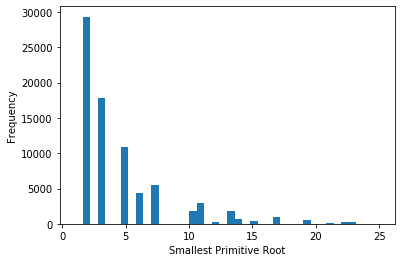

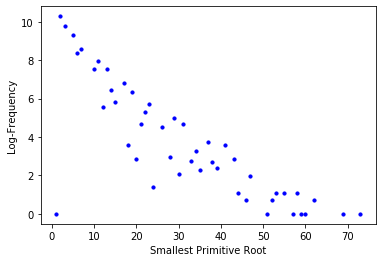

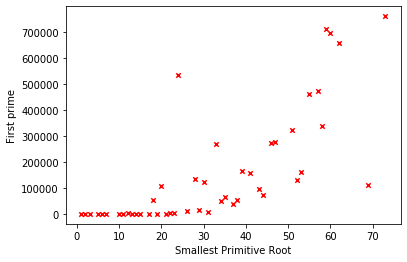

In [35]:
#Visualizing some properties of the smallest primitive root
import matplotlib.pyplot as plt

#The first prime, for which g is the smallest primitive root
first=df.groupby(["Smallest Primitive Root"]).min()
first.rename(columns={"Prime Number": "Smallest Prime Number"},
             inplace=True)
#The frequences of the smallest primitive root
frequences=df.groupby(["Smallest Primitive Root"]).count()
frequences.rename(columns={"Prime Number": "Frequency"},
                  inplace=True)

info=first.merge(frequences, on=["Smallest Primitive Root"])
X=info.reset_index(level=0).to_numpy()

#The frequences of the smallest primitive root
freq=plt.hist(df["Smallest Primitive Root"],bins=40, range=[1,25])
plt.xlabel("Smallest Primitive Root")
plt.ylabel("Frequency")
plt.show()

#Plot of the logarithm of the frequences of the smallest primitive root
plot1=plt.scatter(X[:,0],np.log(X[:,2]),s=40,marker=".",color='b')
plt.xlabel("Smallest Primitive Root")
plt.ylabel("Log-Frequency")
plt.show()

#Plot of the first prime, for which g is the smallest primitive root
plot2=plt.scatter(X[:,0],X[:,1],s=20,marker="x",color='r')
plt.xlabel("Smallest Primitive Root")
plt.ylabel("First prime")
plt.show()

3
